In [1]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv(r"Iris.csv")
# data.head()
data.drop("Id", axis=1, inplace=True)
data.drop_duplicates(inplace=True)
# 之所以映射为1 -1 而不是 0 1 2 是因为感知器的预测结果就是1 -1 
# 目的是为了与感知器预测结果相符
data["Species"] = data["Species"].map({"Iris-versicolor":0, "Iris-virginica":1, "Iris-setosa":-1})
# data["Species"].value_counts() 用于查找所有Species的种类
data = data[data["Species"] != 0] # 删除多余数据集
len(data)

97

In [8]:
class Perception:
    """使用py 实现感知器算法 实现二分类"""
    def __init__(self, alpha, times):
        """初始化方法
        
        Parameters
        ----
        alpha : float
            学习率：用来控制步长 (权重调整的幅度)
        times : int
            循环迭代的次数
        """
        self.alpha = alpha
        self.times = times
    def step(self, z):
        """阶跃函数
        
        Parameters
        ----
        z : 数组类型(或者是标量类型)
            阶越函数参数 可以根据z的值 返回1或者-1 这样就可以实现二分类
        Returns
        ----
        value : int
            如果 z>= 0 返回1 否则-1
        """
        return np.where(z >= 0, 1, -1)
    def fit(self, X, y):
        """根据提供的训练数据 对模型进行训练
        
        Parameters:
        ------------
        X: 类数组类型（特征矩阵） 形状为（样本数量， 特征数量）
            待训练的样本特征
        y: 类数组类型（目标标签），形状为（样本数量）
            每个样本的目标值（分类）
        """
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量 初始值为0 长度比特征多1（截距）
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表 用来保存每次迭代后的损失值
        self.loss_ = []
        # 循环指定的次数
        for i in range(self.times):
            # 感知器与逻辑回归的区别: 逻辑回归中，使用所有样本计算梯度，然后更新权重
            # 而感知其中 是使用单个样本 依次进行计算梯度 更新权重
            loss = 0
            for x, target in zip(X , y):
                # 计算预测值
                y_hat = self.step(np.dot(x, self.w_[1:] + self.w_[0]))
                loss += (y_hat != target)
                # 跟新权重
                # 更新公式: w(j) = w(j) + 学习率 * (真实值 - 预测值) * x(j)
                self.w_[0] += self.alpha * (target - y_hat) * 1
                self.w_[1:] += self.alpha * (target - y_hat) * x
            # 将循环中累计的误差值增加到误差列表当中
            self.loss_.append(loss)
    def predict(self, X):
        """根据参数传递的样本，预测样本数据
        Parameters
        ------
        X : 类数组类型 形状为:[样本数量，特征数量]
            待训练的样本特征
            
        Returns
        ------
        result : 数组类型
                预测的结果(1 or -1)
        """
        return self.step(np.dot(X, self.w_[1:]) + self.w_[0])

In [17]:
t1 = data[data["Species"] == 1]
t2 = data[data["Species"] == -1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40,:-1]], axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40,-1]], axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:,:-1]], axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:,-1]], axis=0)
p = Perception(0.1, 10)
p.fit(train_X, train_y)
result = p.predict(test_X)
# result
display(result)
display(test_y.values)
display(p.w_)
display(p.loss_)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

array([-0.2 ,  0.06, -0.72,  1.36,  0.52])

[1, 2, 2, 0, 0, 0, 0, 0, 0, 0]

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

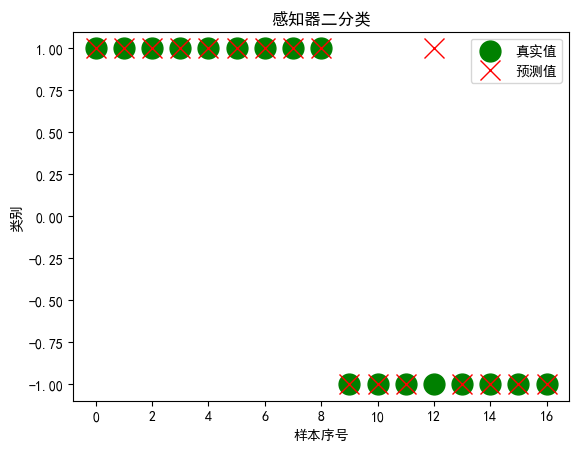

In [18]:
# 绘制真实值
plt.plot(test_y.values, "go", ms=15, label="真实值")
plt.plot(result, "rx", ms=15, label="预测值")
plt.title("感知器二分类")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()

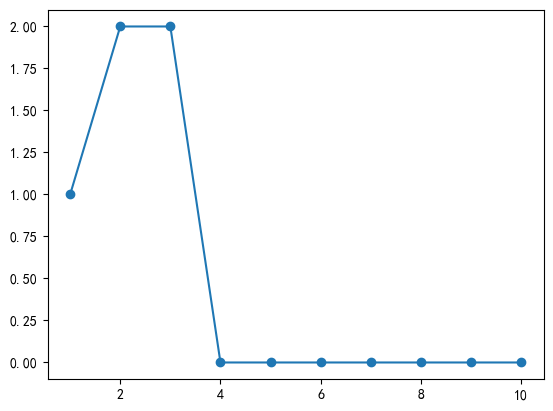

In [19]:
# 绘制目标函数的损失值
plt.plot(range(1, p.times +1), p.loss_, "o-")